# ✨ Projeto Integrado - Sprint 5

</br>

<font size="5"><i>Identificar Jogos em Potenciais para as Campanhas Publicitárias</i></font>

<font size="4"><b>Descrição do Projeto:</b></font>

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.

No nosso dataset é composto de dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

<font size="4"><b>Descrição de Dados do Dataset:</b></font>

- `Name` = Nome
- `Platform` = Plataforma
- `Year_of_Release` = Ano de lançamento
- `Genre` = Gênero
- `NA_sales` = Vendas norte-americanas em milhões de USD
- `EU_sales` = Vendas na Europa em milhões de USD
- `JP_sales` = Vendas no Japão em milhões de USD
- `Other_sales` = Vendas em outros países em em milhões de USD
- `Critic_Score` = Pontuação crítica (máximo de 100)
- `User_Score` =  Pontuação do usuário (máximo de 10)
- `Classificação` = ESRB (Entertainment Software Rating Board - classificação etária, como Adolescente ou Maduro)

*OBS: Os dados de 2016 podem estar incompletos*


<font size="4"><b>Conteúdo:<a id='back'></a></b></font>

* [Etapa 1. Visão Geral do Dados](#data_review)
    * 1.1 Carregando os Datasets e 
    * 1.2 Overview do Dataframe
    * 1.3 Conhecendo os Dados das Colunas do Dataframe
    * 1.4 Conclusão
* [Etapa 2. Pré-Processamento dos Dado](#data_preprocessing)
    * 2.1 Ajustar Nome das Colunas
    * 2.2 Validar Duplicatas
    * 2.3 Ajustando os Tipos de Dados
    * 2.4 Categorizando os Dados
    * 2.5 Conclusão
* [Etapa 3. Análise Exploratória dos Dados](#eda)
    * 3.1 Conhecendo os Anos que Mais Foram Lançado Jogos
    * 3.2 Plataformas que Tiveram Mais Lançamentos de Jogos e Identificar Quando Elas Começam a Desaparecer
    * 3.3 Validando as Plataformas que Mais tiveram Lançamentos e Tendem a Crescer
    * 3.4 Conhecer Quais Plataformas mais Geraram Lucro
    * 3.5 Verificando Como as Avaliações de Usuários e Profissionais Afetam as Vendas das Plataformas
    * 3.6 Comparando as Vendas dos Mesmos Jogos em Outras Plataformas
    * 3.7 Identificando os Gêneros Mais Lucrativos.
    * 3.8 Conclusão
* [Etapa 4. Criando Perfil de Usuário para Cada Região](#perfil)
* [Etapa 5. Testando Hipóteses](#hypotheses)
* [Etapa 6. Conclusão Geral](#Conclusion)


---

###  1º Etapa . Visão Geral do Dados <a id='data_review'></a>

#### 1.1 Carregando os Datasets e Bibliotecas

In [1]:
# Carregando todas as bibliotecas
import pandas as pd # Apartir dessa biblioteca que vamos manipular e análisar nossa amostra de dados


import numpy as np # UBiblioteca de funções matemáticas de alto nível
import matplotlib.pyplot as plt # # Será utilizada para montarmos nossos gráficos
import seaborn as sns # # Será utilizada para montarmos nossos gráficos
from math import factorial # Usado para calcular o Fatorial
from scipy import stats as st # Auxilia nos calculos de probabilidades
import plotly.offline as py # Gráficos interativos
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from termcolor import colored # Utilizado para deixar textos em negrito no código

In [2]:
 # Carregando arquivo com os dados em um DataFrame

df = pd.read_csv('/datasets/games.csv')

#### 1.2 Overview do Dataframe

In [3]:
# Explorando os dados inciais do nosso dataset
# Métodos: head(), info(), describe() e isna()+sum()


print(
    colored('\n\n1º - IMPRIMINDO UMA AMOSTRAGEM DOS DADOS:\n\n', 'green', attrs=['bold', 'underline']),
    df.head(15),
    '\n\n---------------------------------------------------------------------------------\n\n',
    colored('2º - INFORMAÇÕES GERAIS SOBRE O DATAFRAME:\n\n', 'green', attrs=['bold', 'underline']),
)

print(
    df.info(),
    '\n\n---------------------------------------------------------------------------------\n\n',
    colored('3º - OVERVIEW APENAS DAS COLUNAS NÚMERICAS:\n\n', 'green', attrs=['bold', 'underline']),
    df.describe(),
    '\n\n---------------------------------------------------------------------------------\n\n',
    colored('4º - UTILIZANDO A FUNÇÃO ISNA() + SUM() PARA OBTER OS VALORES AUSENTES:\n\n', 'green', attrs=['bold', 'underline']),
    df.isna().sum()
)



1º - IMPRIMINDO UMA AMOSTRAGEM DOS DADOS:

                            Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           200

#### 1.3 Conhecendo os Dados das Colunas do Dataframe
</br>

Vamos validar incialmente as <u><b>váriaveis categóricas</b></u>:
- Name             
- Platform         
- Genre
- Rating  

<i>Lembrando: Variáveis categóricas são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos.</i>

In [4]:
# Explorando os valores e as quantidades de dados

variaveis_categoricas = ('Name','Platform','Genre','Rating')

for elemento in variaveis_categoricas:
    print(colored(f'Coluna {elemento}: \n\n', 'green', attrs=['bold', 'underline']), 
          df[elemento].value_counts(dropna = False), '\n\n\n\n')
    

Coluna Name: 

 Need for Speed: Most Wanted                              12
Madden NFL 07                                             9
LEGO Marvel Super Heroes                                  9
Ratatouille                                               9
FIFA 14                                                   9
                                                         ..
Threads of Fate                                           1
Aidyn Chronicles: The First Mage                          1
Phantasy Star Online Episode III: C.A.R.D. Revolution     1
Build-A-Bear Workshop: A Friend Fur All Seasons           1
Derby Stallion 99                                         1
Name: Name, Length: 11560, dtype: int64 




Coluna Platform: 

 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133

Validaremos agora o restante das <u><b>váriaveis quantitativas</b></u>:

- Year_of_Release             
- User_Score       
- NA_sales         
- EU_sales    
- JP_sales         
- Other_sales      
- Critic_Score 

<i>Lembrando: Variáveis quantitativas são aquelas em que as possíveis realizações (resultados) são números resultantes de uma contagem ou mensuração.</i>

In [5]:
# Explorando os valores e as quantidades de dados

variaveis_quantitativas = ('Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score')

for elemento in variaveis_quantitativas:
        print(colored(f'Coluna {elemento}: \n\n', 'green', attrs=['bold', 'underline']), 
               df[elemento].quantile(np.linspace(0, 1, 11)), '\n\n\n\n')
        


Coluna Year_of_Release: 

 0.0    1980.0
0.1    1999.0
0.2    2002.0
0.3    2004.0
0.4    2006.0
0.5    2007.0
0.6    2009.0
0.7    2010.0
0.8    2011.0
0.9    2014.0
1.0    2016.0
Name: Year_of_Release, dtype: float64 




Coluna NA_sales: 

 0.0     0.00
0.1     0.00
0.2     0.00
0.3     0.01
0.4     0.04
0.5     0.08
0.6     0.12
0.7     0.18
0.8     0.31
0.9     0.61
1.0    41.36
Name: NA_sales, dtype: float64 




Coluna EU_sales: 

 0.0     0.00
0.1     0.00
0.2     0.00
0.3     0.00
0.4     0.01
0.5     0.02
0.6     0.04
0.7     0.08
0.8     0.15
0.9     0.35
1.0    28.96
Name: EU_sales, dtype: float64 




Coluna JP_sales: 

 0.0     0.00
0.1     0.00
0.2     0.00
0.3     0.00
0.4     0.00
0.5     0.00
0.6     0.00
0.7     0.02
0.8     0.06
0.9     0.17
1.0    10.22
Name: JP_sales, dtype: float64 




Coluna Other_sales: 

 0.0     0.00
0.1     0.00
0.2     0.00
0.3     0.00
0.4     0.01
0.5     0.01
0.6     0.01
0.7     0.03
0.8     0.05
0.9     0.10
1.0    10.57
Name: Other_s

<i>OBS: A coluna "User_Score" será analisada posteriormente, pois a mesma está com o tipo de dado errado e precisará ser alterada de "object" para "float"</i>

#### 1.4 Conclusão

Nesta primeira etapa do nosso projeto, com o auxilio de algumas funções do pandas já conseguimos nos familiarizarm com o dataset e identificar as seguintes inconsistências que devem ser tratadas no próximo passo de pré-processamento de dados:

**1º)** De acordo com as regras de boa prática devemos mudar os nomes das colunas, de modo que sejam compostas por letras minúsculas

**2º)** Alterar os `tipo de dados` das seguintes colunas:

    - Year_of_Release = float64 --> int
    - User_Score = object  --> float64
    
 
**3º)** `Valores faltantes` em seis colunas: 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' e 'Rating';


**4º)** Para facilitar a análise vamos calcular o total de vendas (a soma das vendas em todas as regiões) para cada jogo e adicionar esses valores em uma coluna separada.


OBS: temos uma quantidade significativa de  `Valores zerados` em quatro colunas: 'NA_sales', 'EU_sales', 'JP_sales' e 'Other_sales', porém esses dados nos informam que aqueles determinados jogos não tiveram venda nessas regiões para esses determinados jogos


---

###  2º Etapa . Pré-Processamento de Dados <a id='data_preprocessing'></a>

#### 2.1 Ajustar Nome das Colunas

In [6]:
df = df.rename(columns={
    'Name': 'name',
    'Genre': 'genre',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})

In [7]:
# Validando ajuste
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### 2.2 Validar Duplicatas

In [8]:
df.duplicated().sum()

0

#### 2.3 Ajustando os Tipos de Dados

**- Coluna `Year_of_Release`:**

In [9]:
# float64 --> int
df['year_of_release'] = df['year_of_release'].convert_dtypes()

In [10]:
df['year_of_release'].dtypes

Int64Dtype()

**- Coluna `User_Score`:**

In [11]:
# object  --> float64

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [12]:
df['user_score'].dtypes

dtype('float64')

In [13]:
# Verificando todos os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### 2.3 Valores Ausentes

In [14]:
# Relembrando nossos valores ausentes
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**- Coluna `name`:**

In [15]:
# Calculando o pedaço da amostra que está comprometida
(df['name'].isnull().sum() / len(df)) * 100

0.011965300628178284

In [16]:
# Por se tratar de uma amostra muito pequena, iremos deletar essas informações
df.dropna(subset=['name'], inplace=True)

In [17]:
# Validando o ajuste 
df['name'].isnull().sum()

0

**- Coluna `year_of_release`:**

In [18]:
# Calculando o pedaço da amostra que está comprometida
(df['year_of_release'].isnull().sum() / len(df)) * 100

1.6095255190570215

In [19]:
# Por se tratar de uma amostra muito pequena, iremos deletar essas informações
df.dropna(subset=['year_of_release'], inplace=True)

In [20]:
# Validando o ajuste 
df['year_of_release'].isnull().sum()

0

**- Coluna `critic_score`:**

In [21]:
# Calculando o pedaço da amostra que está comprometida
(df['critic_score'].isnull().sum() / len(df)) * 100

51.453417659936754

In [22]:
# Vamos verificar se temos valores atipicos
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [23]:
# Nossa média e mediana são bem próximas, logo não temos valores atípicos significativos
# Então iremos substituir os valores ausentes pela média da coluna
critic_score_mean = df['critic_score'].mean()
df['critic_score'] = df['critic_score'].fillna(critic_score_mean)

In [24]:
# Validando o ajuste
df['critic_score'].isnull().sum()

0

**- Coluna `user_score`:**

In [25]:
# Calculando o pedaço da amostra que está comprometida
(df['user_score'].isnull().sum() / len(df)) * 100

54.61566528825104

In [26]:
# Vamos verificar se temos valores atipicos
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [27]:
# Nossa média e mediana são bem próximas, logo não temos valores atípicos significativos
# Então iremos substituir os valores ausentes pela média da coluna

user_score_mean = df['user_score'].mean()
df['user_score'] = df['user_score'].fillna(user_score_mean)

In [28]:
# Validando o ajuste
df['critic_score'].isnull().sum()

0

**- Coluna `rating`:**

In [29]:
# Calculando o pedaço da amostra que está comprometida
(df['rating'].isnull().sum() / len(df)) * 100

40.59839455120409

In [30]:
# Verificando se os valores ausentes tem alguma correlação com outra coluna
df[df['rating'].isnull()].head(60)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.994363,7.12633,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.994363,7.12633,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.994363,7.12633,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,68.994363,7.12633,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,68.994363,7.12633,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,68.994363,7.12633,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,68.994363,7.12633,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,68.994363,7.12633,NaN


In [31]:
# Aparentemente não há nenhum dependencia com outras colunas
# Aparentemente não foi preechido pois não foi avaliado
# então vamos preencher com um valor padrão esses dados
df['rating'] = df['rating'].fillna("not_rated")

In [32]:
# Validando o ajuste
df['rating'].isnull().sum()

0

#### 2.4 Categorizando os Dados

In [33]:
# Somando os valores das vendas em todas as regiões
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [34]:
# Validando o ajuste
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,not_rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,not_rated,31.38


#### 2.5 Conclusão

Nessa etapa conseguimos realizar a limpeza das divergências que tinhamos em nossos dados e categorizar alguns valores, dessa maneira o nosso dataset está mais confiavel para comerçarmos nossas análise na próxima parte.

---

###  3º Etapa . Análise Exploratória dos Dados <a id='eda'></a>

Agora que já coletamos e pré-processamos os nossos dados iremos começar a extrair informações e conhecer os comportamentos dos clientes, atráves de cálculos e gráficos.

#### 3.1 Conhecendo os Anos que Mais Foram Lançado Jogos

In [35]:
df['year_of_release'].value_counts(dropna = False)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
NaN        0
Name: year_of_release, dtype: Int64

In [36]:
# Plotando as informações a cima em um gráfico

trace = go.Bar(x = df['year_of_release'].values,
               y = df['year_of_release'].index,
               marker = {'color': '#008c8c'})

data = [trace]

layout = go.Layout(title = 'Jogos Lançados por Ano',
                   xaxis = {'title': 'Ano'},
                   yaxis = {'title': 'Qtd de Jogos'},
                   barmode = 'stack')

fig = go.Figure(data=data, layout=layout)


py.iplot(fig)

#### 3.2 Plataformas que Tiveram Mais Lançamentos de Jogos e Identificar Quando Elas Começam a Desaparecer

In [37]:
df['platform'].value_counts(dropna = False)

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [38]:
# Selecionado as 10 plataformas com mais vendas e ajustando uma amostra para cada

PS2 = (df
    .query('platform in ("PS2")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

DS = (df
    .query('platform in ("DS")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PS3 = (df
    .query('platform in ("PS3")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

Wii = (df
    .query('platform in ("Wii")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

X360 = (df
    .query('platform in ("X360")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PSP = (df
    .query('platform in ("PSP")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PS = (df
    .query('platform in ("PS")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PC = (df
    .query('platform in ("PC")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

GBA = (df
    .query('platform in ("GBA")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

XB = (df
    .query('platform in ("XB")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

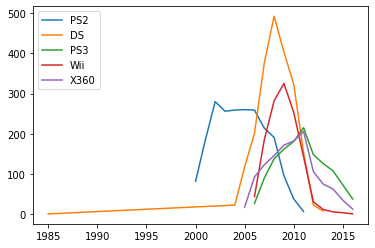

In [39]:
# Plotando um gráfico de linha com as 5 primeiras amostras para análise

plt.plot(PS2, "C0", label="PS2")
plt.plot(DS, "C1", label="DS")
plt.plot(PS3, "C2", label="PS3")
plt.plot(Wii, "C3", label="Wii")
plt.plot(X360, "C4", label="X360")
plt.legend(loc="upper left")

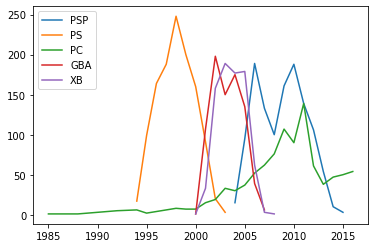

In [40]:
# Plotando um gráfico de linha com as 5 últimas amostras para análise
plt.plot(PSP, "C0", label="PSP")
plt.plot(PS, "C1", label="PS")
plt.plot(PC, "C2", label="PC")
plt.plot(GBA, "C3", label="GBA")
plt.plot(XB, "C4", label="XB")
plt.legend(loc="upper left")

*Foi possível identificar um padrão que em médias as plataformas possuem uma venda de 10 anos e depois tendem a desaparecem.*

In [41]:
# Vamos filtrar nossa amostra aos últimos 10 anos, de 2006 para frente, para deixarmos nosso modelo atualizado

df_new = df[df['year_of_release'] >= 2006]

#### 3.3 Validando as Plataformas que Mais tiveram Lançamentos e Tendem a Crescer

In [42]:
df_new['platform'].value_counts(dropna = False)

DS      1979
PS3     1306
Wii     1286
X360    1214
PSP     1083
PS2      805
PC       776
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
XB        66
GBA       45
GC        44
DC         2
Name: platform, dtype: int64

In [43]:


DS = (df_new
    .query('platform in ("DS")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PS3 = (df_new
    .query('platform in ("PS3")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

Wii = (df_new
    .query('platform in ("Wii")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

X360 = (df_new
    .query('platform in ("X360")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PSP = (df_new
    .query('platform in ("PSP")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PS2 = (df_new
    .query('platform in ("PS2")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PC = (df_new
    .query('platform in ("PC")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

DS3 = (df_new
    .query('platform in ("3DS")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

PSV = (df_new
    .query('platform in ("PSV")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)
PS4 = (df_new
    .query('platform in ("PS4")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

XOne = (df_new
    .query('platform in ("XOne")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

WiiU = (df_new
    .query('platform in ("WiiU")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

XB = (df_new
    .query('platform in ("XB")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

GBA = (df_new
    .query('platform in ("GBA")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)

GC = (df_new
    .query('platform in ("GC")')
    .pivot_table(index=['year_of_release'], values='name', aggfunc='count')
)


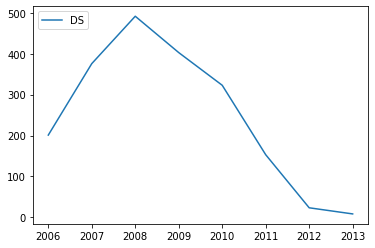

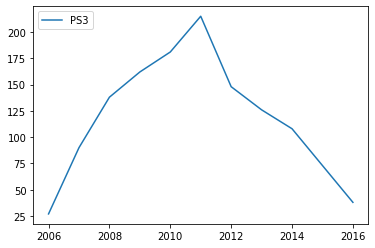

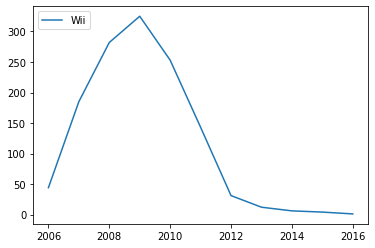

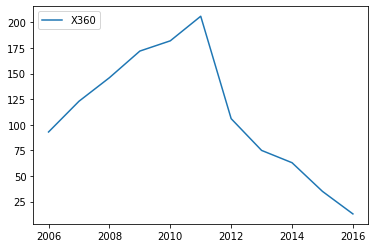

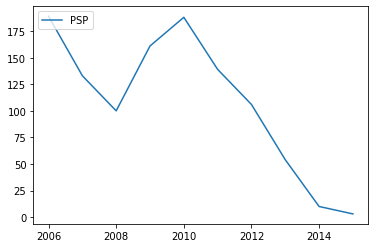

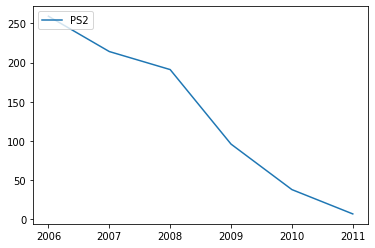

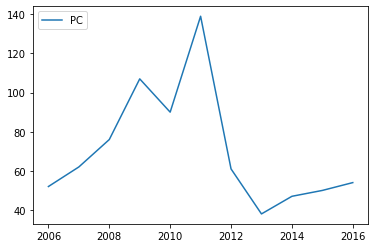

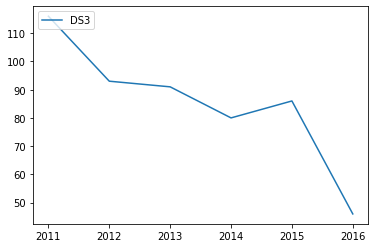

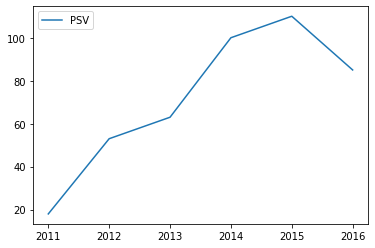

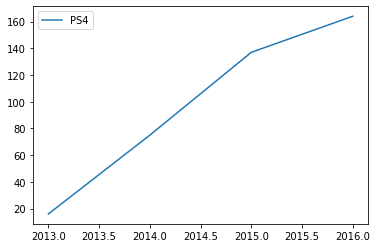

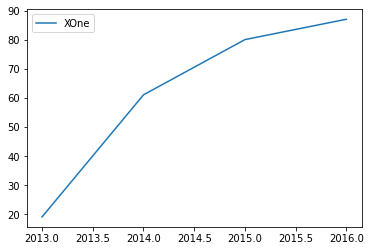

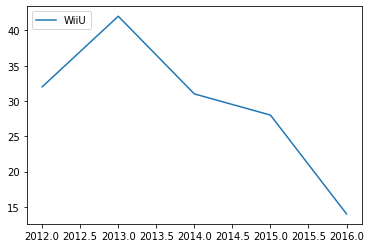

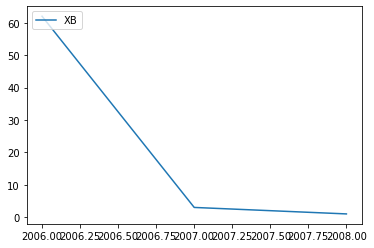

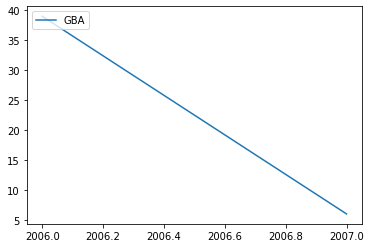

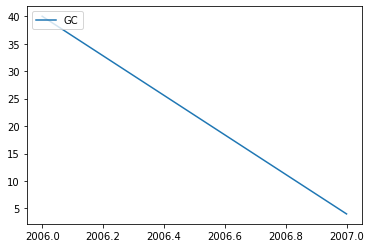

In [44]:
top_platforms = [DS, PS3, Wii, X360, PSP, PS2, PC, DS3, PSV, PS4, XOne, WiiU, XB, GBA, GC]
platform_names = ['DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS2', 'PC', 'DS3', 'PSV', 'PS4', 'XOne', 'WiiU', 'XB', 'GBA', 'GC']

count = 0

for platform in top_platforms:
    plt.plot(platform, label=platform_names[count])
    plt.legend(loc="upper left")
    plt.show()
    count += 1


A partir dos gráficos a cima foi possivel concluir que as plataformas que tendem a crescer em 2017 são:
- PC
- PS4
- XONE

#### 3.4 Conhecer Quais Plataformas mais Geraram Lucro

In [45]:
df_new.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)

platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64

In [46]:
# Verificando esses valores com mais detalhes
df_Wii = df_new[df_new['platform'] == 'Wii']
df_DS = df_new[df_new['platform'] == 'DS']
df_X360 = df_new[df_new['platform'] == 'X360']
df_PS3 = df_new[df_new['platform'] == 'PS3']
df_PS4 = df_new[df_new['platform'] == 'PS4']
df_3DS = df_new[df_new['platform'] == '3DS']
df_PC = df_new[df_new['platform'] == 'PC']
df_XOne = df_new[df_new['platform'] == 'XOne']
df_WiiU = df_new[df_new['platform'] == 'WiiU']
df_PS2 = df_new[df_new['platform'] == 'PS2']
df_PSP = df_new[df_new['platform'] == 'PSP']
df_PSV = df_new[df_new['platform'] == 'PSV']
df_GBA = df_new[df_new['platform'] == 'GBA']
df_GC = df_new[df_new['platform'] == 'GC']
df_XB = df_new[df_new['platform'] == 'XB']
df_DC = df_new[df_new['platform'] == 'DC']

Plataforma: Wii
Mediana: 0.19
Média: 0.6929860031104199


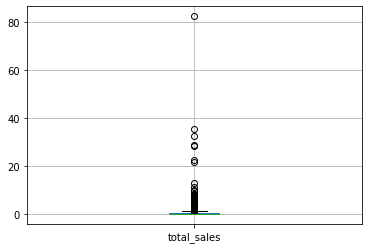


____________________________________________________________________________


Plataforma: DS
Mediana: 0.11
Média: 0.3311520970186963


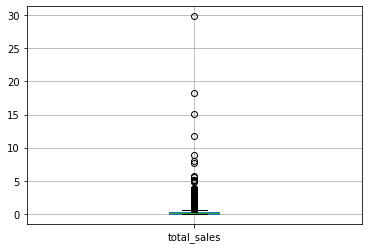


____________________________________________________________________________


Plataforma: X360
Mediana: 0.28
Média: 0.785


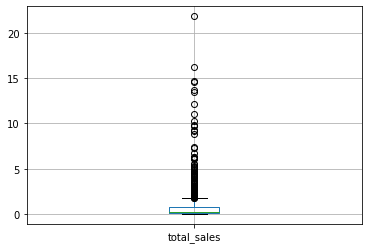


____________________________________________________________________________


Plataforma: PS3
Mediana: 0.27999999999999997
Média: 0.71312404287902


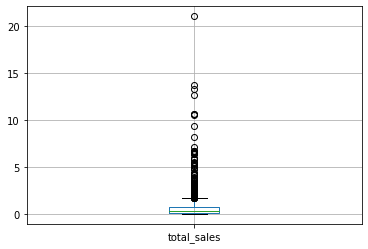


____________________________________________________________________________


Plataforma: PS4
Mediana: 0.2
Média: 0.8013775510204081


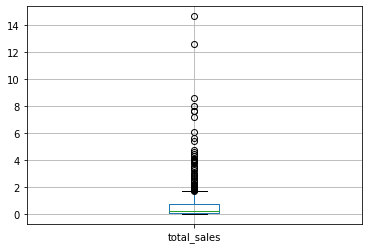


____________________________________________________________________________


Plataforma: 3DS
Mediana: 0.12
Média: 0.50353515625


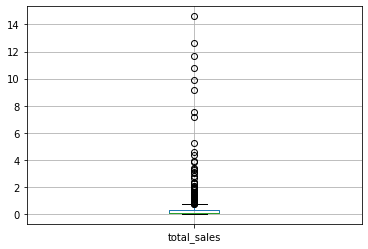


____________________________________________________________________________


Plataforma: PC
Mediana: 0.05
Média: 0.21059278350515465


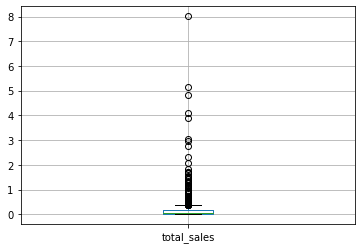


____________________________________________________________________________


Plataforma: XOne
Mediana: 0.22
Média: 0.6450202429149797


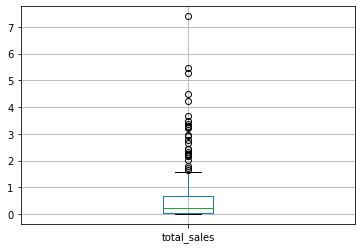


____________________________________________________________________________


Plataforma: WiiU
Mediana: 0.22
Média: 0.5591156462585034


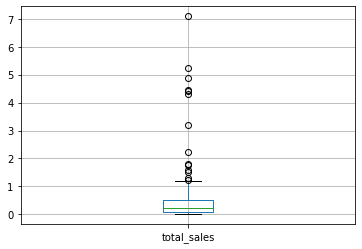


____________________________________________________________________________


Plataforma: PS2
Mediana: 0.13
Média: 0.3301863354037267


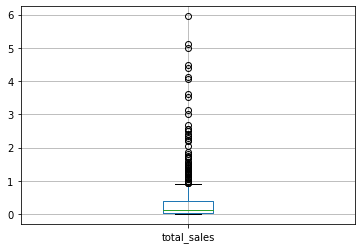


____________________________________________________________________________


Plataforma: PSP
Mediana: 0.08
Média: 0.2203416435826408


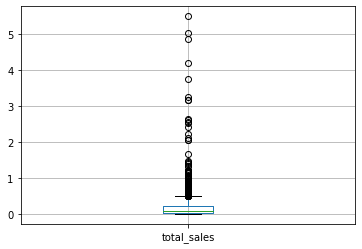


____________________________________________________________________________


Plataforma: PSV
Mediana: 0.05
Média: 0.12543123543123544


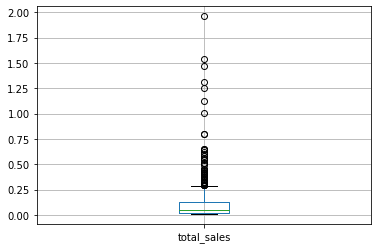


____________________________________________________________________________


Plataforma: GBA
Mediana: 0.07
Média: 0.1928888888888889


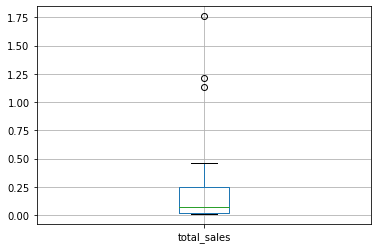


____________________________________________________________________________


Plataforma: GC
Mediana: 0.15
Média: 0.26204545454545447


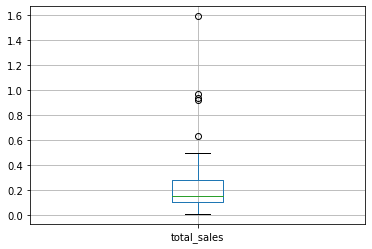


____________________________________________________________________________


Plataforma: XB
Mediana: 0.08
Média: 0.1631818181818182


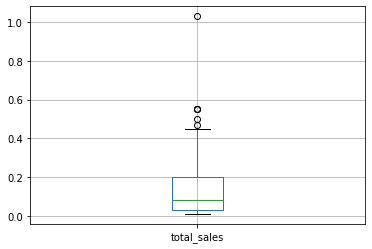


____________________________________________________________________________


Plataforma: DC
Mediana: 0.03
Média: 0.03


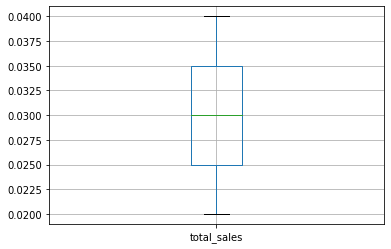


____________________________________________________________________________




In [47]:
platforms = df_new['platform'].unique()
list = [df_Wii, df_DS, df_X360, df_PS3, df_PS4, df_3DS, df_PC, df_XOne, df_WiiU, df_PS2, df_PSP, df_PSV, df_GBA, df_GC, df_XB, df_DC]

count = 0

for dataframe in list:
    print("Plataforma:",platforms[count])
    print("Mediana:", dataframe['total_sales'].median())
    print("Média:",dataframe['total_sales'].mean())
    dataframe.boxplot('total_sales')
    plt.show()
    print("\n____________________________________________________________________________\n\n")
    count += 1



Foi possível identificar que em todas as nossas amostras, com exceção da plataforma DC, os valores das médias eram mais altos do que as da mediana, pois tivemos jogos que foram mais bem vendidos que outros, o que acabou aumentando nosso valor.

Plataformas que mais geraram lucros nesses útimos 10 anos, considerando o valor da média:
- 1º) X360
- 2º) PS3
- 3º) XOne
- 4º) Wiuu
- 5º) PS4

#### 3.5 Verificando Como as Avaliações de Usuários e Profissionais Afetam as Vendas das Plataformas

In [48]:
print(df_X360['critic_score'].corr(df_X360['total_sales']))
print(df_X360['user_score'].corr(df_X360['total_sales']))

0.37654182673086756
0.08308557826728512


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

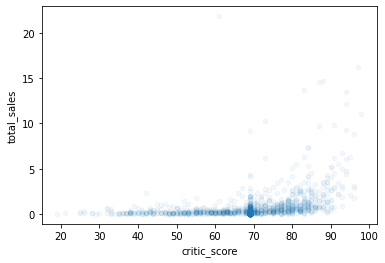

In [49]:
df_X360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.05) 

In [50]:
print(df_PS3['critic_score'].corr(df_PS3['total_sales']))
print(df_PS3['user_score'].corr(df_PS3['total_sales']))

0.41940545215076935
0.0799294384778274


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

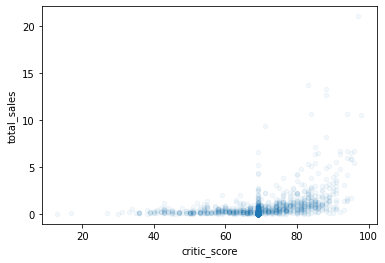

In [51]:
df_PS3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.05) 

In [52]:
print(df_XOne['critic_score'].corr(df_XOne['total_sales']))
print(df_XOne['user_score'].corr(df_XOne['total_sales']))

0.37147693501669
-0.08963448946492547


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

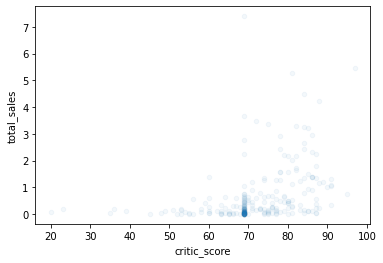

In [53]:
df_XOne.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.05) 

In [54]:
print(df_WiiU['critic_score'].corr(df_WiiU['total_sales']))
print(df_WiiU['user_score'].corr(df_WiiU['total_sales']))

0.32549968084943437
0.34718306838786483


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

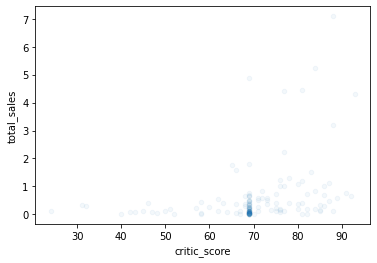

In [55]:
df_WiiU.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.05) 

In [56]:
print(df_PS4['critic_score'].corr(df_PS4['total_sales']))
print(df_PS4['user_score'].corr(df_PS4['total_sales']))

0.34889638836200604
-0.04545391610787535


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

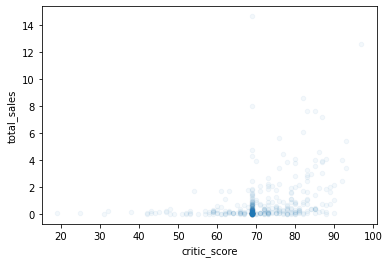

In [57]:
df_PS4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.05) 

*Por mais que não seja muito alto, o valor o "critic_score" possui uma correlação positiva com o número de venda, o que significa que o jogo tende ser mais vendido quando possui uma boa critica de um profissional, entretando a coluna "user_score" possui uma correlação muito próxima do zero, então podemos concluir que não impacta na quantidade de vendas.*

#### 3.6 Comparando as Vendas dos Mesmos Jogos em Outras Plataformas.

In [58]:
df_new['name'].value_counts(dropna = False).head(30)

FIFA 14                                    9
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 15                                    8
Terraria                                   8
Madden NFL 07                              8
Angry Birds Star Wars                      8
LEGO Star Wars II: The Original Trilogy    8
Lego Batman 3: Beyond Gotham               8
LEGO The Hobbit                            8
Cars                                       8
LEGO Jurassic World                        8
The LEGO Movie Videogame                   8
Madden NFL 08                              8
FIFA Soccer 13                             8
Skylanders: Trap Team                      7
Lego Star Wars: The Force Awakens          7
FIFA Soccer 11                             7
Surf's Up                                  7
Skylanders: SuperChargers                  7
Need For Speed: Undercover                 7
Spider-Man 3                               7
Wall-E    

In [59]:
FIFA_14 = df_new[df_new['name'] == 'FIFA 14'][['platform','total_sales']]
LEGO_Marvel_Super_Heroes = df_new[df_new['name'] == 'LEGO Marvel Super Heroes'][['platform','total_sales']]
Ratatouille = df_new[df_new['name'] == 'Ratatouille'][['platform','total_sales']]
Madden_NFL_07 = df_new[df_new['name'] == 'Madden NFL 07'][['platform','total_sales']]
Angry_Birds_Star_Wars = df_new[df_new['name'] == 'Angry Birds Star Wars'][['platform','total_sales']]

<AxesSubplot:xlabel='platform'>

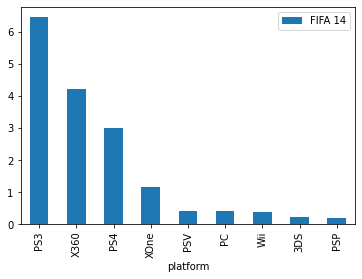

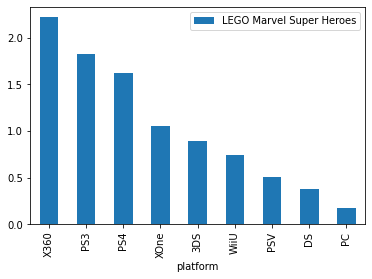

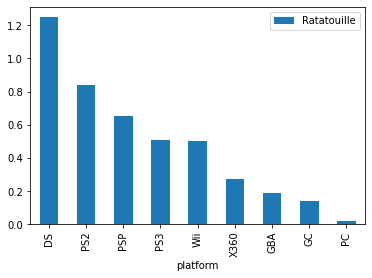

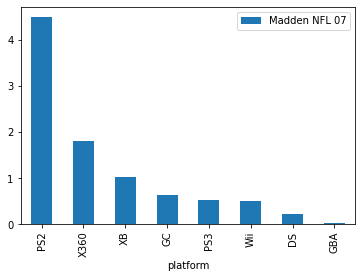

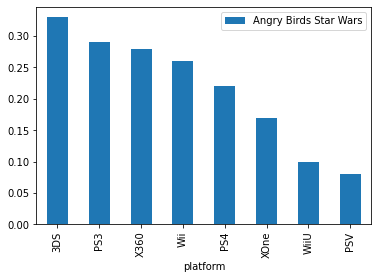

In [60]:
FIFA_14.plot(x='platform', y='total_sales', kind='bar', label='FIFA 14')
LEGO_Marvel_Super_Heroes.plot(x='platform', y='total_sales', kind='bar', label='LEGO Marvel Super Heroes')
Ratatouille.plot(x='platform', y='total_sales', kind='bar', label='Ratatouille')
Madden_NFL_07.plot(x='platform', y='total_sales', kind='bar', label='Madden NFL 07')
Angry_Birds_Star_Wars.plot(x='platform', y='total_sales', kind='bar', label='Angry Birds Star Wars')

Foi coletado 5 jogos que foram lançados para diversas plataformas e foi possível validar que as plataformas que mais se destacavam nas vendas eram o X360, PS3 e PS4.

#### 3.7 Identificando os Gêneros Mais Lucrativos.

In [61]:
df_new.groupby(['genre'])['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.972917
Platform        0.822765
Sports          0.629041
Racing          0.532028
Role-Playing    0.524498
Action          0.468787
Fighting        0.456223
Misc            0.442825
Simulation      0.364109
Puzzle          0.245683
Strategy        0.186107
Adventure       0.138172
Name: total_sales, dtype: float64

#### 3.8 Conclusão

Nesta fase do projeto foi possível coletar bastantes insights que irão nos ajudar a contruir uma ótima campanha publicitária.

---

###  4º Etapa . Criando Perfil de Usuário para Cada Região <a id='perfil'></a>

**- Região AN:**

In [62]:
# Total de Vendas
df_new['na_sales'].sum()

2386.67

In [63]:
# Verificando em média qual plataforma tende vender mais
df_new.groupby('platform')['na_sales'].mean().sort_values(ascending=False)

platform
X360    0.485041
Wii     0.378593
XOne    0.377004
PS3     0.298721
PS4     0.277398
WiiU    0.259184
GC      0.198182
DS      0.163714
3DS     0.161426
PS2     0.142720
XB      0.121364
GBA     0.114444
PSP     0.074367
PC      0.057281
PSV     0.029068
DC      0.000000
Name: na_sales, dtype: float64

In [64]:
# Verificando em média qual gênero tende vender mais
df_new.groupby('genre')['na_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.506282
Platform        0.394853
Sports          0.314295
Racing          0.236530
Fighting        0.228354
Misc            0.227502
Action          0.222687
Role-Playing    0.200432
Simulation      0.177871
Puzzle          0.116093
Strategy        0.072468
Adventure       0.060137
Name: na_sales, dtype: float64

In [65]:
# Verificando em médvia qual classificação tende vender mais
df_new.groupby('rating')['na_sales'].mean().sort_values(ascending=False)

rating
M            0.522118
E            0.328381
E10+         0.246985
T            0.236553
EC           0.220000
not_rated    0.073612
RP           0.000000
Name: na_sales, dtype: float64

<u>***Perfil Região: AN***</u>

*Top 5 Plataformas:*
- X360;    
- Wii;    
- XOne;   
- PS3;     
- PS4. 

*Top 5 Gêneros:*
- Shooter;        
- Platform;       
- Sports;          
- Racing;  
- Fighting.

*Top ESRB:*
- M.

**- Região EU:**

In [66]:
df_new['eu_sales'].sum()

1496.0

In [67]:
df_new.groupby('platform')['eu_sales'].mean().sort_values(ascending=False)

platform
PS4     0.359923
PS3     0.250544
X360    0.220667
XOne    0.208866
Wii     0.200871
WiiU    0.170952
PC      0.129278
3DS     0.119668
DS      0.072254
PS2     0.057491
GC      0.053182
PSP     0.050055
GBA     0.041778
XB      0.036515
PSV     0.030466
DC      0.000000
Name: eu_sales, dtype: float64

In [68]:
df_new.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.324138
Platform        0.240059
Racing          0.201762
Sports          0.199326
Action          0.147229
Misc            0.117223
Simulation      0.115083
Role-Playing    0.111064
Fighting        0.103220
Puzzle          0.075874
Strategy        0.061858
Adventure       0.037048
Name: eu_sales, dtype: float64

In [69]:
df_new.groupby('rating')['eu_sales'].mean().sort_values(ascending=False)

rating
M            0.362636
E            0.189984
E10+         0.135748
T            0.131311
not_rated    0.060925
RP           0.030000
EC           0.000000
Name: eu_sales, dtype: float64

<u>***Perfil Região: EU***</u>

*Top 5 Plataformas:*
- PS4;    
- PS3;    
- X360;    
- XOne;    
- Wii.     

*Top 5 Gêneros:*
- Shooter;        
- Platform;       
- Racing;          
- Sports;  
- Action.

*Top ESRB:*
- M.

**- Região JP:**

In [70]:
df_new['jp_sales'].sum()

561.31

In [71]:
df_new.groupby('platform')['jp_sales'].mean().sort_values(ascending=False)

platform
3DS     0.196523
WiiU    0.088503
DS      0.071496
PSP     0.065217
PS3     0.060804
Wii     0.053095
PSV     0.050909
PS2     0.044634
PS4     0.040714
GBA     0.033556
DC      0.030000
X360    0.009901
GC      0.004773
XOne    0.001377
PC      0.000000
XB      0.000000
Name: jp_sales, dtype: float64

In [72]:
df_new.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)

genre
Role-Playing    0.171064
Platform        0.103529
Fighting        0.069274
Misc            0.051500
Action          0.042851
Sports          0.038803
Simulation      0.038465
Strategy        0.034936
Puzzle          0.033962
Adventure       0.028866
Shooter         0.026255
Racing          0.023488
Name: jp_sales, dtype: float64

In [73]:
df_new.groupby('rating')['jp_sales'].mean().sort_values(ascending=False)

rating
not_rated    0.074200
E            0.049592
T            0.046793
M            0.039809
E10+         0.028637
EC           0.000000
RP           0.000000
Name: jp_sales, dtype: float64

<u>***Perfil Região: JP***</u>

*Top 5 Plataformas:*
- 3DS;   
- WiiU;
- DS;
- PSP;
- PS3.   

*Top 5 Gêneros:*
- Role-Playing;    
- Platform;        
- Fighting;       
- Misc;           
- Action.          

*Top ESRB:*
- Os jogos mais utilizados em JP não foram classificados.

---

###  5º Etapa . Testando Hipóteses<a id='hypotheses'></a>

Nessa etapa vamos testar as seguintes hipóteses:

1º) As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas
<br>
2º) As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

Para ambas as hipoteses iremos comparar as médias de duas populações estatísticas diferentes, então será aplicado o método scipy.stats.ttest_ind(array1, array2, equal_var).

In [74]:
# 1º)

# Definindo hipótese nula H₀ = As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

user_score_xone = df_new[df_new['platform'] == "XOne"]['user_score'].values
user_score_pc = df_new[df_new['platform'] == "PC"]['user_score'].values

# nível crítico de significância estatística padrão
alpha = 0.05

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")



p-value: 0.021435473266243826
Nós rejeitamos a hipótese nula


In [75]:
# 1º)

# Definindo hipótese alternativa H₁ = As classificações médias dos usuários das plataformas Xbox One e PC não são as mesmas

print('p-value:', results.pvalue)

if results.pvalue > alpha:
    print("Nós rejeitamos a hipótese alternativa")
else:
    print("Nós não podemos rejeitar a hipótese alternativa")
    

p-value: 0.021435473266243826
Nós não podemos rejeitar a hipótese nula


In [76]:
# 2º)

# Definindo hipótese nula H₀ =  As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) não são diferentes

user_score_action = df_new[df_new['genre'] == "Action"]['user_score'].values
user_score_sports = df_new[df_new['genre'] == "Sports"]['user_score'].values

# nível crítico de significância estatística padrão
alpha = 0.05

results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")
    

p-value: 4.571038404232361e-09
Nós não podemos rejeitar a hipótese nula


In [77]:
# 2º)

# Definindo hipótese alternativa H₁ = As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

print('p-value:', results.pvalue)

if results.pvalue > alpha:
    print("Nós rejeitamos a hipótese alternativa")
else:
    print("Nós não podemos rejeitar a hipótese alternativa")
    

p-value: 4.571038404232361e-09
Nós rejeitamos a hipótese nula


---

###  6º Etapa . Conclusão Geral<a id='conclusion'></a>

Depois de ter realizado todas as etapas a cima foi possível identificar algumas caracteristicas que determinam se um jogo tem sucesso ou não:


- Consoles que foram lançados recentemente, como o PS4 e o XOne tendem ter mais vendas;

- Os Jogos de PC também está com uma perspectiva boa de crescimento como visto anteriormente nos gráficos;

- A avaliação dos profissionais, na coluna "critic_score" impacta positivamente no número de vendas; 

- Levar em conta que região tem um perfil de jogo diferente, principalmente quando se trata da região JP.


<u>***Perfil Região: AN***</u>

*Top 5 Plataformas:*
- X360;    
- Wii;    
- XOne;   
- PS3;     
- PS4. 

*Top 5 Gêneros:*
- Shooter;        
- Platform;       
- Sports;          
- Racing;  
- Fighting.

*Top ESRB:*
- M.


<u>***Perfil Região: EU***</u>

*Top 5 Plataformas:*
- PS4;    
- PS3;    
- X360;    
- XOne;    
- Wii.     

*Top 5 Gêneros:*
- Shooter;        
- Platform;       
- Racing;          
- Sports;  
- Action.

*Top ESRB:*
- M.


<u>***Perfil Região: JP***</u>

*Top 5 Plataformas:*
- 3DS;   
- WiiU;
- DS;
- PSP;
- PS3.   

*Top 5 Gêneros:*
- Role-Playing;    
- Platform;        
- Fighting;       
- Misc;           
- Action.          

*Top ESRB:*
- Os jogos mais utilizados em JP não foram classificados.